In [157]:
%reset

import numpy as np
import matplotlib.pyplot as pl
from astropy.io import fits
from scipy import interpolate
import matplotlib
import pdb

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
/home/ebaxter/anaconda2/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  # This is added back by InteractiveShellApp.init_path()


We imagine a two-dimensional data space, $(d_1, d_2)$, and a two dimensional parameter space, $(\theta_1, \theta_2)$.  We assume that the expectation value of the data is $\langle (d_1,d_2) \rangle = (\theta_1, \theta_2)$; in other words, the parameters describe the expectation values of the data.  We assume a Gaussian likelihood of the form

$\ln \mathcal{L}(\vec{d}|\vec{\theta}) = -\frac{1}{2} (\vec{d} - \langle d \rangle)^T C^{-1} (\vec{d} - \langle d \rangle) $

Given observed data $(a_1,a_2)$, posterior samples can be generated from a multivariate Gaussian centered at $(a_1, a_2)$ with covariance $C$.

In [158]:
#test statistic
def get_T_chi2(dd, theta, cov):
    diff = dd - theta
    temp = np.dot(np.linalg.inv(cov),diff.transpose()).transpose()
    T = np.sum(diff*temp, axis = 1)
    return T

def get_PPD_prob(dprime, cov_dprime, post):
    #compute P(dprime | dobs) given dprime, a posterior resulting from dobs, and covariance of dprime
    
    means_of_dprime = post #since in our example, the mean data vector is given exactly by the parameter values
    diff = dprime - means_of_dprime
    temp = np.dot(np.linalg.inv(cov_dprime),diff.transpose()).transpose()
    chi2 = np.sum(diff*temp, axis = 1)
    probs = np.exp(-0.5*chi2)
    return np.sum(probs)

def get_pval(dprime_obs, ppd_realizations, cov_dprime, post_d):
    #Get Delta - fraction of PPD draws that have P(draw) < P(obs)
    
    #single number
    P_dobsprime_given_dobs = get_PPD_prob(dprime_obs, cov_dprime, post_d)

    P_dprime_given_dobs = np.zeros(ppd_realizations.shape[0])
    for ii in range(0,P_dprime_given_dobs.shape[0]):
        P_dprime_given_dobs[ii] = get_PPD_prob(ppd_realizations[ii,:], cov_dprime, post_d)
    highp = np.where(P_dobsprime_given_dobs > P_dprime_given_dobs)[0]
    pval = 1.0*len(highp)/P_dprime_given_dobs.shape[0]
    #pdb.set_trace()
    return pval
    

In [176]:
#actual data realization is a_1 and a_2

different_cov = True #Whether or not experiments have different parameter covariances
N_sims = 500
p_vals = np.zeros(N_sims)

for si in range(0,N_sims):
    print("si = ", si)
    if (different_cov):
        rho = 0.99
        sigmaxx = 1.0
        sigmaxy = rho*sigmaxx
        cov_exp1 = np.array([[sigmaxx, sigmaxy],[sigmaxy, sigmaxx]])
        cov_exp2 = np.array([[sigmaxx,-sigmaxy],[-sigmaxy, sigmaxx]]) 
        
        #Random data realizations - generated from same underlying true parameters
        a_exp1 = np.array([0., 0.]) + np.random.multivariate_normal(np.array([0., 0.]), cov_exp1, 1)[:,0]
        a_exp2 = np.array([0., 0.]) + np.random.multivariate_normal(np.array([0., 0.]), cov_exp2, 1)[:,0]

    if (not different_cov):
        a_exp1 = np.array([0., 0.])
        a_exp2 = np.array([0., 0.])
        rho = 0.1
        sigmaxx = 1.0
        sigmaxy = rho*sigmaxx
        cov_exp1 = np.array([[sigmaxx, sigmaxy],[sigmaxy, sigmaxx]])
        cov_exp2 = np.copy(cov_exp1)


    ntrials = 50000

    #posterior samples
    post_exp1 = np.random.multivariate_normal(a_exp1, cov_exp1, ntrials)
    post_exp2 = np.random.multivariate_normal(a_exp2, cov_exp2, ntrials)
    #for each parameter value from posterior from experiment 1, draw possible data from experiment 2
    a_exp2_rep = post_exp1 + np.random.multivariate_normal([0., 0.], cov_exp2, ntrials)

    p_val = get_pval(a_exp2, a_exp2_rep, cov_exp2, post_exp1)
    p_vals[si] = p_val


si =  0
si =  1
si =  2
si =  3
si =  4
si =  5
si =  6
si =  7
si =  8
si =  9
si =  10
si =  11
si =  12
si =  13
si =  14
si =  15
si =  16
si =  17
si =  18
si =  19
si =  20
si =  21
si =  22
si =  23
si =  24
si =  25
si =  26
si =  27
si =  28
si =  29
si =  30
si =  31
si =  32
si =  33
si =  34
si =  35
si =  36
si =  37
si =  38
si =  39
si =  40
si =  41
si =  42
si =  43
si =  44
si =  45
si =  46
si =  47
si =  48
si =  49
si =  50
si =  51
si =  52
si =  53
si =  54
si =  55
si =  56
si =  57
si =  58
si =  59
si =  60
si =  61
si =  62
si =  63
si =  64
si =  65
si =  66
si =  67
si =  68
si =  69
si =  70
si =  71
si =  72
si =  73
si =  74
si =  75
si =  76
si =  77
si =  78
si =  79
si =  80
si =  81
si =  82
si =  83
si =  84
si =  85
si =  86
si =  87
si =  88
si =  89
si =  90
si =  91
si =  92
si =  93
si =  94
si =  95
si =  96
si =  97
si =  98
si =  99
si =  100
si =  101
si =  102
si =  103
si =  104
si =  105
si =  106
si =  107
si =  108
si =  109
si =  110


KeyboardInterrupt: 

(500,)


(array([181.,  15.,  10.,  17.,  13.,  14.,  11.,  10.,  11.,  12.,  10.,
         10.,  14.,  12.,  10.,  18.,  18.,  19.,  25.,  70.]),
 array([0.      , 0.049999, 0.099998, 0.149997, 0.199996, 0.249995,
        0.299994, 0.349993, 0.399992, 0.449991, 0.49999 , 0.549989,
        0.599988, 0.649987, 0.699986, 0.749985, 0.799984, 0.849983,
        0.899982, 0.949981, 0.99998 ]),
 <a list of 20 Patch objects>)

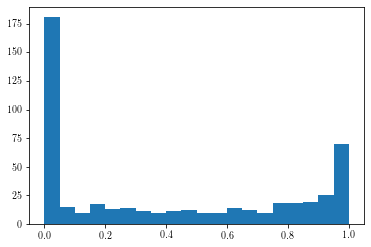

In [177]:
print(p_vals.shape)
fig, ax = pl.subplots(1,1)
ax.hist(p_vals, bins = 20)

p_val =  0.995


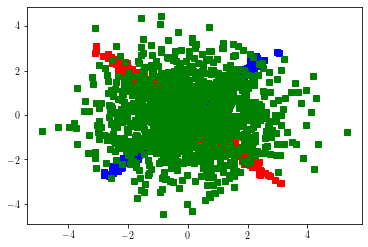

In [161]:

fig, ax = pl.subplots(1,1)
ax.plot(post_exp1[:,0], post_exp1[:,1], 'bs')
ax.plot(post_exp2[:,0], post_exp2[:,1], 'rs')
ax.plot(a_exp2_rep[:,0], a_exp2_rep[:,1], 'gs')

#p_test = get_PPD_prob(a_exp2_rep[0,:], cov_exp2, post_exp1)
#print(p_test)
print("p_val = ", p_val)    

In [108]:
#d_1 is like posterior chain from d_1. mu_2 is observed data 2.  d_2_rep is ppd for d_2, generated at d_1.
T = get_T_chi2(a_exp2, post_exp1, cov_exp2)
T_rep = get_T_chi2(a_exp2_rep, post_exp1, cov_exp2)


#T_d2_fix = get_T(d_2, d_1, type = 'chi2')
#T_d2_fix = get_T(d_2, d_1, type = 'chi2fixed')
#T_d2_rep_fix = get_T(d_2_rep, d_1, type = 'chi2fixed')
#T_d2_mean = get_T(d_2, d_1, type = 'mean')
#T_d2_rep_mean = get_T(d_2_rep, d_1, type = 'mean')

Text(7.0, 500.0, '$p = 0.49$')

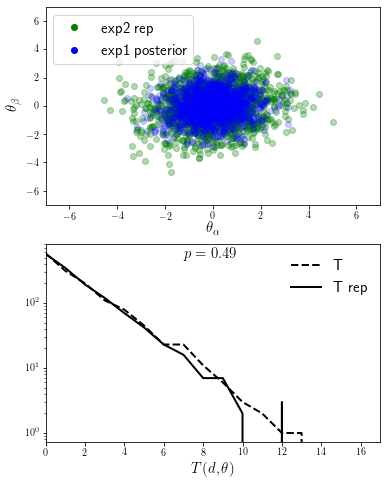

In [111]:

p_val = 1.0*len(np.where(T_rep > T)[0])/len(T)

if (not different_cov):
    rep_color = 'green'
    post_color = 'blue'
    
    fig, ax = pl.subplots(2,1, figsize = (6,8))
    ax[0].plot(a_exp2_rep[:,0], a_exp2_rep[:,1], color = rep_color, marker = 'o', alpha = 0.3, ls = 'None')
    ax[0].plot(post_exp1[:,0], post_exp1[:,1], color = post_color, marker = 'o', alpha = 0.2, ls = 'None')
    #ax.plot(d_2[:,0], d_2[:,1], 'r,', label = 'd2')
    
    #for legend
    ax[0].plot([-10], [-10], color = post_color, marker = 'o', label = r'exp1 posterior', alpha = 1.0, ls = 'None')
    ax[0].plot([-10], [-10], color = rep_color, marker = 'o', label = r'exp2 rep', alpha = 1.0, ls = 'None')
    
    #switch legend order
    handles,labels = ax[0].get_legend_handles_labels()
    handles = [handles[1], handles[0]]
    labels = [labels[1], labels[0]]
    
    ax[0].legend(handles, labels, frameon = True, fontsize = 15, loc = 'upper left')
    ax[0].set_xlim((-7., 7.))
    ax[0].set_ylim((-7., 7.))
    
    ax[0].set_xlabel(r'$\theta_{\alpha}$', fontsize = 15)
    ax[0].set_ylabel(r'$\theta_{\beta}$', fontsize = 15)
    
    bins = 20
    min_chi2 = 0.
    max_chi2 = 20.
    
if (different_cov):
    rep_color = 'mediumpurple'
    post1_color = 'blue'
    post2_color = 'red'
    
    fig, ax = pl.subplots(2,1, figsize = (6,8))
    ax[0].plot(a_exp2_rep[:,0], a_exp2_rep[:,1], color = rep_color, marker = 'o',  alpha = 0.3, ls = 'None')
    ax[0].plot(post_exp1[:,0], post_exp1[:,1], color = post1_color, marker = 'o', alpha = 0.2, ls = 'None')
    ax[0].plot(post_exp2[:,0], post_exp2[:,1], marker = 'o', color = post2_color, ls = 'None')

    #for legend
    ax[0].plot([-10], [-10], color = rep_color, marker = 'o', label = r'$d_B^{\rm rep}$', ls = 'None')
    ax[0].plot([-10], [-10], color = post1_color, marker = 'o', label = r'post1', ls = 'None')
    ax[0].plot([-10], [-10], marker = 'o', color = post2_color, label = r'post2', ls = 'None')

    #switch legend order
    handles,labels = ax[0].get_legend_handles_labels()
    handles = [handles[1], handles[2], handles[0]]
    labels = [labels[1], labels[2], labels[0]]
    
    ax[0].legend(handles, labels, frameon = True, fontsize = 15)
    ax[0].set_xlim((-7., 7.))
    ax[0].set_ylim((-7., 7.))
    
    ax[0].set_xlabel(r'$\theta_{\alpha}$', fontsize = 15)
    ax[0].set_ylabel(r'$\theta_{\beta}$', fontsize = 15)
    
    bins = 50
    min_chi2 = 0.
    max_chi2 = 50.

a_exp2_rep_hist, a_exp2_rep_bins = np.histogram(T_rep, range = (min_chi2, max_chi2), bins = bins)
a_exp2_hist, a_exp2_bins = np.histogram(T, range = (min_chi2, max_chi2), bins = bins)

T_color = 'green'
ax[1].plot(a_exp2_bins[:-1], a_exp2_hist, label = r'T', color = 'black', lw = 2, ls = 'dashed')
ax[1].plot(a_exp2_rep_bins[:-1], a_exp2_rep_hist, label = r'T rep', color = 'black', lw = 2)
ax[1].set_xlim((min_chi2, max_chi2-3))
ax[1].set_xlabel(r'$T(d,\theta)$', fontsize = 15)
ax[1].legend(loc = 'upper right', fontsize = 15, frameon = False)
ax[1].set_yscale('log')

ax[1].text(7., 500., r'$p = ' + '{0:.2f}'.format(p_val) + '$', size = 15)
    